# Project

In [1]:
# to have plots with time, set  EPOCHS=99999 and MAX_RUNTIME=60, PLOT_TIME = True
# to have plots with iters, set EPOCHS=20 and MAX_RUNTIME=999999999, PLOT_TIME = False
PLOT_TIME = True
EPOCHS = 99999999999999999
ITERS_PER_BATCH = 40
MINI_BATCH_SIZE = 256
MAX_RUNTIME = 180
LEARNING_RATE_DECAY = {
    "SGD": 0.9999995,
    "SAG": 0.999999,
    "SAGA": 0.999999,
    "SVGR": 0.99999,
    "SARAH": 0.99999,
    "SARAH+": 0.99999,
    "SpiderBoost": 0.999999,
    "SNVRG": 0.9999,
} if PLOT_TIME else {
    "SGD": 0.996,
    "SAG": 0.996,
    "SAGA": 0.996,
    "SVGR": 0.996,
    "SARAH": 0.996,
    "SARAH+": 0.996,
    "SpiderBoost": 0.996,
    "SNVRG": 0.996,
}
DPI_PLOTS = 200
FRAME_ANIMATION = 1
DOWNLOAD_AND_STORE = False
SHOW_ANIMATION = False
# one from:
# - "mse",
# - "robust_lin_reg",
# - "cross_entropy_regularized"
LOSS = "cross_entropy_regularized"
# one from:
# - mnist
# - cat-vs-dog
# - bio-or-not
# - fish-or-not
DATASET = "cat-vs-dog"


In [2]:
from tensorflow import keras
import matplotlib.pyplot as plt
import math
import tensorflow as tf
import numpy as np
import os
import time
from PIL import Image
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [3]:
def decode_image(image_file_names, FINAL_SIZE, PAD_CROP_SIZE):
    images = []
    for image_path in image_file_names:
        image = np.array(Image.open(image_path))
        if len(image.shape) < 3:
            image = np.repeat(image[:, :, np.newaxis], 3, axis=2)
        try:
            images.append(
                tf.image.rgb_to_grayscale(
                    tf.image.resize(
                        tf.image.resize_with_crop_or_pad(image, PAD_CROP_SIZE, PAD_CROP_SIZE),
                        (FINAL_SIZE, FINAL_SIZE)
                    )
                )
            )
        except:
            print("Error loading:", image_path)
    return images

In [4]:
if DATASET == "mnist":
    (x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
    data = np.concatenate((x_train, x_test))
    targets = np.concatenate((y_train, y_test)).astype("int")
    data = data[np.logical_or(targets == 0, targets == 1)]
    targets = targets[np.logical_or(targets == 0, targets == 1)]
    data = PCA(n_components=2).fit_transform(MinMaxScaler().fit_transform(data.reshape((data.shape[0], -1))))
elif DATASET == "cat-vs-dog":
    if DOWNLOAD_AND_STORE:
        DATA_DIR = "datasets/cat-vs-dog/"
        SIZE = 100
        PAD_CROP_SIZE = 500
        print("Locating images 'cats or dog'")
        cats_train_image_file_names = [DATA_DIR+"cat/"+i for i in sorted(os.listdir(DATA_DIR+"cat")) if not i.startswith(".")][0:7000]
        dogs_train_image_file_names = [DATA_DIR+"dog/"+i for i in sorted(os.listdir(DATA_DIR+"dog")) if not i.startswith(".")][0:7000]
        print("Loading images")
        cats = np.array(decode_image(cats_train_image_file_names, SIZE, PAD_CROP_SIZE))
        dogs = np.array(decode_image(dogs_train_image_file_names, SIZE, PAD_CROP_SIZE))
        print("Shuffling images")
        data = np.concatenate((cats, dogs)).reshape((-1, SIZE*SIZE))
        shuffle = np.random.permutation(list(range(0, len(data))))
        targets = np.concatenate((np.zeros(len(cats)), np.ones(len(dogs))))
        data = data[shuffle]
        targets = targets[shuffle]
        plt.imshow(1-cats[3].reshape((SIZE, SIZE)), cmap="gray")
        print("Applying PCA")
        data = MinMaxScaler().fit_transform(PCA(n_components=300).fit_transform(data.reshape((data.shape[0], -1))))
        print("Saving in filesystem")
        with open('datasets/cat-vs-dog/loaded-rescaled-data.npy', 'wb') as f:
            np.save(f, data)
        with open('datasets/cat-vs-dog/loaded-rescaled-targets.npy', 'wb') as f:
            np.save(f, targets)
    else:
        print("Loading from cached file 'cats or dog'")
        with open('datasets/cat-vs-dog/loaded-rescaled-data.npy', 'rb') as f:
            data = np.load(f)
        with open('datasets/cat-vs-dog/loaded-rescaled-targets.npy', 'rb') as f:
            targets = np.load(f)
elif DATASET == "bio-or-not":
    if DOWNLOAD_AND_STORE:
        DATA_DIR = "datasets/bio-or-not/"
        SIZE = 100
        PAD_CROP_SIZE = 200
        print("Locating images 'bio or not'")
        bio_train_image_file_names = [DATA_DIR+"bio/"+i for i in sorted(os.listdir(DATA_DIR+"bio")) if not i.startswith(".")][0:7000]
        not_train_image_file_names = [DATA_DIR+"not/"+i for i in sorted(os.listdir(DATA_DIR+"not")) if not i.startswith(".")][0:7000]
        print("Loading images")
        bios = np.array(decode_image(bio_train_image_file_names, SIZE, PAD_CROP_SIZE))
        nots = np.array(decode_image(not_train_image_file_names, SIZE, PAD_CROP_SIZE))
        print("Shuffling images")
        data = np.concatenate((bios, nots)).reshape((-1, SIZE*SIZE))
        shuffle = np.random.permutation(list(range(0, len(data))))
        targets = np.concatenate((np.zeros(len(bios)), np.ones(len(nots))))
        data = data[shuffle]
        targets = targets[shuffle]
        plt.imshow(1-bios[3].reshape((SIZE, SIZE)), cmap="gray")
        print("Applying PCA")
        data = MinMaxScaler().fit_transform(PCA(n_components=300).fit_transform(data.reshape((data.shape[0], -1))))
        print("Saving in filesystem")
        with open('datasets/bio-or-not/loaded-rescaled-data.npy', 'wb') as f:
            np.save(f, data)
        with open('datasets/bio-or-not/loaded-rescaled-targets.npy', 'wb') as f:
            np.save(f, targets)
    else:
        print("Loading from cached file 'bio or not'")
        with open('datasets/bio-or-not/loaded-rescaled-data.npy', 'rb') as f:
            data = np.load(f)
        with open('datasets/bio-or-not/loaded-rescaled-targets.npy', 'rb') as f:
            targets = np.load(f)
elif DATASET == "fish-or-not":
    if DOWNLOAD_AND_STORE:
        DATA_DIR = "datasets/fish-or-not/"
        SIZE = 100
        PAD_CROP_SIZE = 500
        print("Locating images 'fish or not'")
        fish_train_image_file_names = [DATA_DIR+"fish/"+i for i in sorted(os.listdir(DATA_DIR+"fish")) if not i.startswith(".")][0:7000]
        not_train_image_file_names = [DATA_DIR+"not/"+i for i in sorted(os.listdir(DATA_DIR+"not")) if not i.startswith(".")][0:7000]
        print("Loading images")
        fishes = np.array(decode_image(fish_train_image_file_names, SIZE, PAD_CROP_SIZE))
        nots = np.array(decode_image(not_train_image_file_names, SIZE, PAD_CROP_SIZE))
        print("Shuffling images")
        data = np.concatenate((fishes, nots)).reshape((-1, SIZE*SIZE))
        shuffle = np.random.permutation(list(range(0, len(data))))
        targets = np.concatenate((np.zeros(len(fishes)), np.ones(len(nots))))
        data = data[shuffle]
        targets = targets[shuffle]
        plt.imshow(1-fishes[3].reshape((SIZE, SIZE)), cmap="gray")
        print("Applying PCA")
        data = MinMaxScaler().fit_transform(PCA(n_components=1000).fit_transform(data.reshape((data.shape[0], -1))))
        print("Saving in filesystem")
        with open('datasets/fish-or-not/loaded-rescaled-data.npy', 'wb') as f:
            np.save(f, data)
        with open('datasets/fish-or-not/loaded-rescaled-targets.npy', 'wb') as f:
            np.save(f, targets)
    else:
        print("Loading from cached file 'fish or not'")
        with open('datasets/fish-or-not/loaded-rescaled-data.npy', 'rb') as f:
            data = np.load(f)
        with open('datasets/fish-or-not/loaded-rescaled-targets.npy', 'rb') as f:
            targets = np.load(f)

Loading from cached file 'cats or dog'


In [5]:
if SHOW_ANIMATION:
    indexes = np.random.choice(list(range(len(data))), 1000)
    data = data[indexes]
    targets = targets[indexes]
    data = MinMaxScaler().fit_transform(PCA(n_components=2).fit_transform(data))

In [6]:
starting_point = {
    "cat-vs-dog": {
        "robust_lin_reg": np.zeros(data.shape[1]),
        "mse": np.zeros(data.shape[1]),
        "cross_entropy_regularized": np.zeros(data.shape[1]) + 0.1,
    },
    "bio-or-not": {
        "robust_lin_reg": np.zeros(data.shape[1]),
        "mse": np.zeros(data.shape[1]),
        "cross_entropy_regularized": np.zeros(data.shape[1]) + 0.01,
    },
    "fish-or-not": {
        "robust_lin_reg": np.zeros(data.shape[1]),
        "mse": np.zeros(data.shape[1]),
        "cross_entropy_regularized": np.zeros(data.shape[1]) + 0.01,
    }
}[DATASET][LOSS]

In [7]:
MIN = {
    "cat-vs-dog":{
        "mse": 1,
        "robust_lin_reg": 0.1119473612180889,
        "cross_entropy_regularized": 0.6928701583010055,
    },
    "bio-or-not":{
        "mse": 1,
        "robust_lin_reg": 0.07250611336253084,
        "cross_entropy_regularized": 0.686974374546113,
    },
    "fish-or-not":{
        "mse": 1,
        "robust_lin_reg": 0.01751466441643479,
        "cross_entropy_regularized": 0.26535480270464623,
    }
}[DATASET][LOSS]

## Loss & Grad

In [8]:
#MIN SQUARE ERROR (CONVEX)
def loss_mse(data, targets, w):
    return np.square(data@w - targets).mean()
def grad_mse_array(data, params, targets):
    return -1 / data.shape[0] * data.T @ (targets - data @ params)
def grad_mse_single(sample, params, target):
    return -1 * (target - sample @ params) * sample


# ROBUST LINEAR REGRESSION (NON CONVEX)
def loss_robust_lin_reg(data, targets, w):
    return np.log(np.square(targets - data@w)/2 + 1).mean()
def grad_robust_lin_reg_single(sample, w, target):
    return 1/((target - sample@w)**2 / 2 + 1) * (target - sample@w) * -sample
def grad_robust_lin_reg_array(data, w, targets):
    return (1/
            ((targets - data@w)**2 / 2 + 1) *
            (targets - data@w) @
            -data)/ data.shape[0]


# CROSS ENTROPY WITH REGULARIZER (NON CONVEX)
alpha = 1/10
def loss_cross_entropy_regularized(data, targets, w):
    return (
                   -np.log(1e-10 + 1/(1+ np.exp(-np.dot(data, w).astype("float64")))) * targets
                   -np.log(1e-10 + 1 - 1/(1+ np.exp(-np.dot(data, w).astype("float64")))) * (1-targets)
           ).mean() + \
           (w**2 / (w**2 + 1)).sum() * alpha
def grad_cross_entropy_regularized_single(sample, w, target):
    return (-target * np.exp(-np.dot(sample, w)) + (1-target)) / (1 + np.exp(-np.dot(sample, w))) * sample + 2*w / (w**2 + 1)**2 * alpha
def grad_cross_entropy_regularized_array(data, w, targets):
    return ((-targets * np.exp(-np.dot(data, w)) + (1-targets)) /
             (1 + np.exp(-np.dot(data, w))) @ data) / data.shape[0] + (2*w / (w**2 + 1)**2) * alpha

assert LOSS in ["mse", "robust_lin_reg", "cross_entropy_regularized"]
# PROXY
def loss(data, w, targets):
    if LOSS == "robust_lin_reg":
        return loss_robust_lin_reg(data, targets, w)
    elif LOSS == "mse":
        return loss_mse(data, targets, w)
    elif LOSS == "cross_entropy_regularized":
        return loss_cross_entropy_regularized(data, targets, w)
def grad_single(sample, w, target):
    if LOSS == "robust_lin_reg":
        return grad_robust_lin_reg_single(sample, w, target)
    elif LOSS == "mse":
        return grad_mse_single(sample, w, target)
    elif LOSS == "cross_entropy_regularized":
        return grad_cross_entropy_regularized_single(sample, w, target)
def grad_array(data, w, targets):
    if LOSS == "robust_lin_reg":
        return grad_robust_lin_reg_array(data, w, targets)
    elif LOSS == "mse":
        return grad_mse_array(data, w, targets)
    elif LOSS == "cross_entropy_regularized":
        return grad_cross_entropy_regularized_array(data, w, targets)

In [9]:
import plotly.graph_objects as go
if SHOW_ANIMATION and data.shape[1] == 2:
    starting_point = np.array([40, 80])
    x = np.linspace(-5,50, 100)
    y = np.linspace(-5,90, 100)
    X, Y = np.meshgrid(x, y)
    Z = np.array([
        [loss(data, np.array([x,y]), targets) for x,y in zip(x_r, y_r)]
        for x_r, y_r in zip(X,Y)
    ])

    fig = go.Figure(data=[
        go.Scatter3d(
            name="Starting point",
            x=[starting_point[0]], y=[starting_point[1]], z=[loss(data, starting_point, targets)],
            marker=dict(
                size=5,
                color="red",
                colorscale='Viridis',
            ),
        ),
        go.Surface(
            showscale=False,
            z=Z, x=X, y=Y,
            colorscale="Viridis",
            colorbar=None
        ),
    ], )
    import json
    camera = json.loads("{'center': {'x': 0.006366696856033653, 'y': -0.05218330435246074, 'z': -0.0739852163325267}, 'eye': {'x': -0.7885156751277191, 'y': -1.1561474889685182, 'z': 0.7659138958640532}}".replace("'", '"'))
    fig.update_layout(scene_camera=camera)

    fig.update_layout(
        width=1600,height=1200,autosize=True,
        scene=dict(
            aspectratio = dict( x=1, y=1, z=1 ),
            aspectmode = 'manual'
        ),
    )
    fig.show(renderer="browser")

## Stepsizes

In [10]:
# USING PCA TOP 300
# Starting from [1,1,...,1]
STEP_SIZES = {
    "mnist": {
        "mse": {
            "SGD": 0.01,
            "SAG": 0.0005,
            "SAGA": 0.001,
            "SVGR": 0.001,
            "SARAH": 0.001,
            "SARAH+": 0.01,
            "SpiderBoost": 0.05,
            "SNVRG": 1,
        },
        "robust_lin_reg": {
            "SGD": 0.08,
            "SAG": 0.01,
            "SAGA": 0.01,
            "SVGR": 0.01,
            "SARAH": 0.005,
            "SARAH+": 0.005,
            "SpiderBoost": 0.5,
            "SNVRG": 0.5,
        },
        "cross_entropy_regularized": {
            "SGD": 0.1,
            "SAG": 0.01,
            "SAGA": 0.01,
            "SVGR": 0.01,
            "SARAH": 0.01,
            "SARAH+": 0.05,
            "SpiderBoost": 0.5,
            "SNVRG": 0.5,
        }
    },
    "cat-vs-dog": {
        "mse": {
            "SGD": 0.001,
            "SAG": 0.0001,
            "SAGA": 0.001,
            "SVGR": 0.001,
            "SARAH": 0.001,
            "SARAH+": 0.001,
            "SpiderBoost": 0.02,
            "SNVRG": 10,
        },
        "robust_lin_reg": {
            "SGD": 0.001,
            "SAG": 0.001,
            "SAGA": 0.001,
            "SVGR": 0.01,
            "SARAH": 0.01,
            "SARAH+": 0.01,
            "SpiderBoost": 0.05,
            "SNVRG": 5,
        },
        "cross_entropy_regularized": {
            "SGD": 0.0001 / 25,
            "SAG": 0.0001 / 25,
            "SAGA": 0.0002 / 25,
            "SVGR": 0.0005 / 100,
            "SARAH": 0.001 / 100,
            "SARAH+": 0.001 / 100,
            "SpiderBoost": 0.001 / 50,
            "SNVRG": 10 * 100,
        }
    },
    "bio-or-not": {
        "mse": {
            "SGD": 0.001,
            "SAG": 0.001,
            "SAGA": 0.001,
            "SVGR": 0.001,
            "SARAH": 0.001,
            "SARAH+": 0.001,
            "SpiderBoost": 0.001,
            "SNVRG": 1,
        },
        "robust_lin_reg": {
            "SGD": 0.001,
            "SAG": 0.001,
            "SAGA": 0.01,
            "SVGR": 0.005,
            "SARAH": 0.005,
            "SARAH+": 0.005,
            "SpiderBoost": 0.05,
            "SNVRG": 2,
        },
        "cross_entropy_regularized": {
            "SGD": 0.001,
            "SAG": 0.001,
            "SAGA": 0.001,
            "SVGR": 0.001,
            "SARAH": 0.001,
            "SARAH+": 0.001,
            "SpiderBoost": 0.01,
            "SNVRG": 10,
        }
    },
    "fish-or-not": {
        "mse": {
            "SGD": 0.001,
            "SAG": 0.001,
            "SAGA": 0.001,
            "SVGR": 0.001,
            "SARAH": 0.001,
            "SARAH+": 0.001,
            "SpiderBoost": 0.001,
            "SNVRG": 1,
        },
        "robust_lin_reg": {
            "SGD": 0.002,
            "SAG": 0.0001,
            "SAGA": 0.01,
            "SVGR": 0.01,
            "SARAH": 0.01,
            "SARAH+": 0.01,
            "SpiderBoost": 0.01,
            "SNVRG": 10,
        },
        "cross_entropy_regularized": {
            "SGD": 0.001,
            "SAG": 0.001,
            "SAGA": 0.01,
            "SVGR": 0.05,
            "SARAH": 0.2,
            "SARAH+": 0.2,
            "SpiderBoost": 0.6,
            "SNVRG": 1,
        }
    }
}

In [11]:
def getMiniBatch():
    c_d = []
    c_t = []
    for i in range(data.shape[0] // MINI_BATCH_SIZE):
        indexes = np.random.choice(list(range(data.shape[0])), MINI_BATCH_SIZE, replace=False)
        c_d.append(data[indexes])
        c_t.append(targets[indexes])
    return np.array(c_d), np.array(c_t)

## SGD

In [12]:
%%time
w = np.copy(starting_point)
track_loss_sgd = [loss(data, w, targets)]
track_time_sgd = [0]
track_w_sgd = [w]
time_counter = time.time()
start =  time.time()
step = STEP_SIZES[DATASET][LOSS]["SGD"]
decay = LEARNING_RATE_DECAY["SGD"]
for _ in range(EPOCHS):
    if MAX_RUNTIME and MAX_RUNTIME < time.time() - start: break
    for _ in range(2):
        if MAX_RUNTIME and MAX_RUNTIME < time.time() - start: break
        chunked_data, chunked_target = getMiniBatch()
        print("*", end="")
        for c_data, c_targets in zip(chunked_data, chunked_target):
            if MAX_RUNTIME and MAX_RUNTIME < time.time() - start: break
            for _ in range(ITERS_PER_BATCH):
                index = np.random.randint(0, c_data.shape[0])
                w = w - step * grad_single(c_data[index], w, c_targets[index])
                step *= decay

                if (time.time() - time_counter) > MAX_RUNTIME / FRAME_ANIMATION :
                    time_counter = time.time()
                    track_w_sgd.append(w)
        track_time_sgd.append(time.time() - start)
        track_loss_sgd.append(loss(data, w, targets))

****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

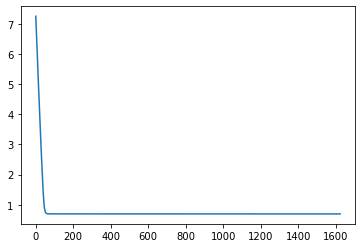

In [13]:
plt.plot(track_loss_sgd)

## SAG

In [14]:
%%time
w = np.copy(starting_point)
track_loss_sag = [loss(data, w, targets)]
start =  time.time()
track_w_sag = [w]
time_counter = time.time()
track_time_sag = [0]
step = STEP_SIZES[DATASET][LOSS]["SAG"]
decay = LEARNING_RATE_DECAY["SAG"]

for _ in range(EPOCHS):
    if MAX_RUNTIME and MAX_RUNTIME < time.time() - start: break
    for _ in range(2):
        if MAX_RUNTIME and MAX_RUNTIME < time.time() - start: break
        chunked_data, chunked_target = getMiniBatch()
        for c_data, c_targets in zip(chunked_data, chunked_target):
            if MAX_RUNTIME and MAX_RUNTIME < time.time() - start: break
            g = np.array([grad_single(c_data[i], w, c_targets[i]) for i in range(c_data.shape[0])])
            for _ in range(ITERS_PER_BATCH):
                index = np.random.randint(0, c_data.shape[0])
                g[index] = grad_single(c_data[index], w, c_targets[index])
                w = w - step * np.mean(g, axis=0)

                if (time.time() - time_counter) > MAX_RUNTIME / FRAME_ANIMATION :
                    time_counter = time.time()
                    track_w_sag.append(w)
                step *= decay
        track_time_sag.append(time.time() - start)
        track_loss_sag.append(loss(data, w, targets))

CPU times: user 8min 1s, sys: 19min 8s, total: 27min 9s
Wall time: 3min


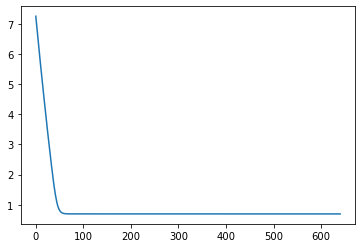

In [15]:
plt.plot(track_loss_sag)

## SAGA

In [16]:
%%time
w = np.copy(starting_point)
track_loss_saga = [loss(data, w, targets)]
start =  time.time()
track_time_saga = [0]
track_w_saga = [w]
time_counter = time.time()
step = STEP_SIZES[DATASET][LOSS]["SAGA"]
decay = LEARNING_RATE_DECAY["SAGA"]

for i in range(EPOCHS):
    if MAX_RUNTIME and MAX_RUNTIME < time.time() - start: break
    for _ in range(2):
        if MAX_RUNTIME and MAX_RUNTIME < time.time() - start: break
        chunked_data, chunked_target = getMiniBatch()
        for c_data, c_targets in zip(chunked_data, chunked_target):
            if MAX_RUNTIME and MAX_RUNTIME < time.time() - start: break
            g = np.array([grad_single(c_data[i], w, c_targets[i]) for i in range(c_data.shape[0])])
            for _ in range(ITERS_PER_BATCH):
                index = np.random.randint(0, c_data.shape[0])
                gradient = grad_single(c_data[index], w, c_targets[index])
                w = w - step * (np.mean(g, axis=0)  - g[index] + gradient)
                g[index] = gradient
                step *= decay

                if (time.time() - time_counter) > MAX_RUNTIME / FRAME_ANIMATION :
                    time_counter = time.time()
                    track_w_saga.append(w)
        track_time_saga.append(time.time() - start)
        track_loss_saga.append(loss(data, w, targets))

CPU times: user 7min 9s, sys: 19min 49s, total: 26min 59s
Wall time: 3min


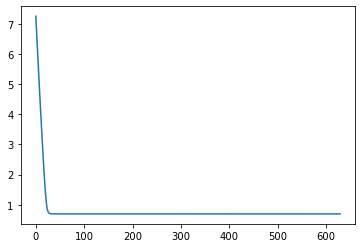

In [17]:
plt.plot(track_loss_saga)

## SVGR

In [18]:
%%time
w = np.copy(starting_point)
track_loss_svrg = [loss(data, w, targets)]
start =  time.time()
track_time_svrg = [0]
track_w_svrg = [w]
time_counter = time.time()
step = STEP_SIZES[DATASET][LOSS]["SVGR"]
decay = LEARNING_RATE_DECAY["SVGR"]

for i in range(EPOCHS):
    if MAX_RUNTIME and MAX_RUNTIME < time.time() - start: break
    for _ in range(2):
        if MAX_RUNTIME and MAX_RUNTIME < time.time() - start: break
        chunked_data, chunked_target = getMiniBatch()
        for i, (c_data, c_targets) in enumerate(zip(chunked_data, chunked_target)):
            if MAX_RUNTIME and MAX_RUNTIME < time.time() - start: break
            for _ in range(ITERS_PER_BATCH):
                w_tilde = np.copy(w)
                avg_gradients = grad_array(c_data, w, c_targets)
                for j in range(c_data.shape[0] // 16):
                    index = np.random.randint(0, c_data.shape[0])
                    w = w - step * (
                            grad_single(c_data[index], w, c_targets[index]) -
                            grad_single(c_data[index], w_tilde, c_targets[index]) +
                            avg_gradients
                    )
                step *= decay

                if (time.time() - time_counter) > MAX_RUNTIME / FRAME_ANIMATION :
                    time_counter = time.time()
                    track_w_svrg.append(w)
        track_time_svrg.append(time.time() - start)
        track_loss_svrg.append(loss(data, w, targets))

CPU times: user 26min 55s, sys: 1min 22s, total: 28min 18s
Wall time: 3min


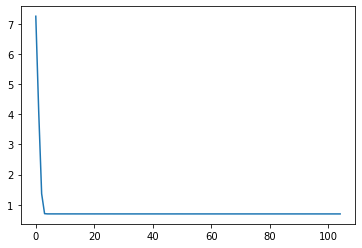

In [19]:
plt.plot(track_loss_svrg)

## SARAH

In [20]:
%%time
w = np.copy(starting_point)
track_loss_sarah = [loss(data, w, targets)]
start =  time.time()
track_time_sarah = [0]
track_w_sarah = [w]
time_counter = time.time()
step = STEP_SIZES[DATASET][LOSS]["SARAH"]
decay = LEARNING_RATE_DECAY["SARAH"]

for i in range(EPOCHS):
    if MAX_RUNTIME and MAX_RUNTIME < time.time() - start: break
    for _ in range(2):
        if MAX_RUNTIME and MAX_RUNTIME < time.time() - start: break
        chunked_data, chunked_target = getMiniBatch()
        for c_data, c_targets in zip(chunked_data, chunked_target):
            if MAX_RUNTIME and MAX_RUNTIME < time.time() - start: break
            for _ in range(ITERS_PER_BATCH):
                w_0 = np.copy(w)
                v_0 = grad_array(c_data, w, c_targets)
                w = w_0 - step * v_0
                for t in range(np.random.randint(0, c_data.shape[0] // 16)):
                    index = np.random.randint(0, c_data.shape[0])
                    v_0 = (
                            grad_single(c_data[index], w, c_targets[index]) -
                            grad_single(c_data[index], w_0, c_targets[index]) +
                            v_0
                    )
                    w_0 = np.copy(w)
                    w = w - step * v_0

                step *= decay
                if (time.time() - time_counter) > MAX_RUNTIME / FRAME_ANIMATION :
                    time_counter = time.time()
                    track_w_sarah.append(w)
        track_time_sarah.append(time.time() - start)
        track_loss_sarah.append(loss(data, w, targets))

CPU times: user 26min 56s, sys: 1min 32s, total: 28min 29s
Wall time: 3min


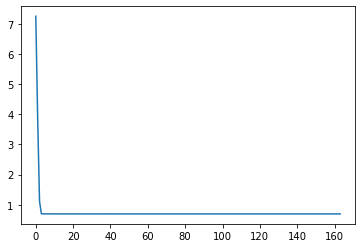

In [21]:
plt.plot(track_loss_sarah)

## SARAH+

In [22]:
%%time
w = np.copy(starting_point)
track_loss_sarah_plus = [loss(data, w, targets)]
start =  time.time()
track_time_sarah_plus = [0]
track_w_sarah_plus = [w]
time_counter = time.time()
step = STEP_SIZES[DATASET][LOSS]["SARAH+"]
decay = LEARNING_RATE_DECAY["SARAH+"]

for i in range(EPOCHS):
    if MAX_RUNTIME and MAX_RUNTIME < time.time() - start: break
    for _ in range(2):
        if MAX_RUNTIME and MAX_RUNTIME < time.time() - start: break
        chunked_data, chunked_target = getMiniBatch()
        for c_data, c_targets in zip(chunked_data, chunked_target):
            if MAX_RUNTIME and MAX_RUNTIME < time.time() - start: break
            for _ in range(ITERS_PER_BATCH):
                w_0 = np.copy(w)
                v_0 = grad_array(c_data, w, c_targets)
                w = w_0 - step * v_0
                v_t = np.copy(v_0)
                for t in range(c_data.shape[0] // 16):
                    if np.linalg.norm(v_t)**2 < 1/8 * (np.linalg.norm(v_0) ** 2):
                        break
                    index = np.random.randint(0, c_data.shape[0])
                    v_t = (
                            grad_single(c_data[index], w, c_targets[index]) -
                            grad_single(c_data[index], w_0, c_targets[index]) +
                            v_t
                    )
                    w_0 = np.copy(w)
                    w = w - step * v_t

                step *= decay
                if (time.time() - time_counter) > MAX_RUNTIME / FRAME_ANIMATION :
                    time_counter = time.time()
                    track_w_sarah_plus.append(w)
        track_time_sarah_plus.append(time.time() - start)
        track_loss_sarah_plus.append(loss(data, w, targets))

CPU times: user 27min 7s, sys: 1min 23s, total: 28min 30s
Wall time: 3min


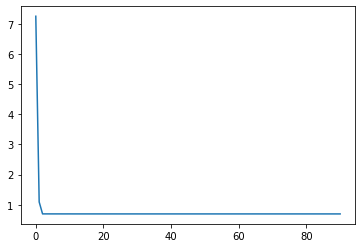

In [23]:
plt.plot(track_loss_sarah_plus)

## SpiderBoost

In [24]:
%%time
w = np.copy(starting_point)
w_previous = np.zeros(data.shape[1])

track_loss_spider_boost = [loss(data, w, targets)]
track_time_spider_boost = [0]
track_w_spider_boost = [w]
time_counter = time.time()

start =  time.time()
step = STEP_SIZES[DATASET][LOSS]["SpiderBoost"]
decay = LEARNING_RATE_DECAY["SpiderBoost"]


for i in range(EPOCHS):
    if MAX_RUNTIME and MAX_RUNTIME < time.time() - start: break
    for _ in range(2):
        if MAX_RUNTIME and MAX_RUNTIME < time.time() - start: break
        chunked_data, chunked_target = getMiniBatch()
        for c_data, c_targets in zip(chunked_data, chunked_target):
            if MAX_RUNTIME and MAX_RUNTIME < time.time() - start: break
            all_indexes = list(range(c_data.shape[0]))
            v_previous = grad_array(c_data, w, c_targets)
            for i in range(ITERS_PER_BATCH):
                q = int(math.sqrt(c_data.shape[0]))
                if  i % q == 0:
                    vk = grad_array(c_data, w, c_targets)
                else:
                    sample_indexes = np.random.choice(all_indexes, q)
                    samples_data = c_data[sample_indexes]
                    samples_targets = c_targets[sample_indexes]

                    first = grad_array(samples_data, w, samples_targets)
                    second = grad_array(samples_data, w_previous, samples_targets)
                    vk = (first - second) + v_previous


                w_previous = np.copy(w)
                v_previous = np.copy(vk)
                w = w - step * vk
                step *= decay
                if (time.time() - time_counter) > MAX_RUNTIME / FRAME_ANIMATION :
                    time_counter = time.time()
                    track_w_spider_boost.append(w)
        track_time_spider_boost.append(time.time() - start)
        track_loss_spider_boost.append(loss(data, w, targets))

CPU times: user 24min 8s, sys: 4min 25s, total: 28min 33s
Wall time: 3min


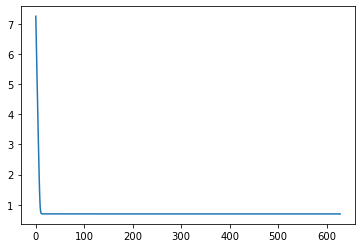

In [25]:
plt.plot(track_loss_spider_boost)

## SNVRG

In [26]:
def updateReferencePoints(wl_old, w, r, K):
    wl_new  = []
    for l in range(r):
        wl_new.append(wl_old[l])
    for l in range(r, K+1):
        wl_new.append(w)
    return np.array(wl_new)

def updateReferenceGradients(gl_old, wl_new, r, K, Bl, data, targets):
    gl_new  = []
    for l in range(r):
        gl_new.append(gl_old[l])
    for l in range(r, K+1):
        indexes = np.random.choice(list(range(data.shape[0])), Bl[l], replace=False)
        gl_new.append(grad_array(data[indexes], wl_new[l], targets[indexes]) -
                      grad_array(data[indexes], wl_new[l-1], targets[indexes]))
    return gl_new
rs = []
def oneEpochSNVRG(w, M, data, targets):
    w = np.copy(w)
    K = 2
    B = 256
    b = 2
    Bl = np.array([B/(b**(i+1)) for i in range(K+1)]).astype("int")
    Tl = np.array([b for _ in range(K+1)])
    wl = np.array([w for _ in range(K+1)])
    wl_history = [[w for _ in range(K+1)]]
    gl = np.array([np.zeros(np.shape(w)).tolist() for _ in range(K+1)])
    indexes = np.random.choice(list(range(data.shape[0])), B, replace=False)
    gl[0] = grad_array(data[indexes], w, targets[indexes])
    v = np.sum(gl, axis=0)
    w = w - 1/(10 * M) * v
    wl_history.append(np.copy(w))
    for t in range(1, np.prod(Tl) - 1):
        r = 0
        for j in range( K + 1):
            if t % np.prod(Tl[j+1:]) == 0:
                r = j
                break
        rs.append(r)

        wl = updateReferencePoints(wl, w, r, K)
        gl = updateReferenceGradients(gl, wl, r, K, Bl, data, targets)

        v = np.sum(gl, axis=0)
        w = w - 1/(10 * M) * v
        wl_history.append(np.copy(w))

    return wl_history[np.random.randint(wl.shape[0] - 1)], w

In [27]:
%%time
w = np.copy(starting_point)
w_previous = np.zeros(data.shape[1])

track_loss_snvrg = [loss(data, w, targets)]
track_time_snvrg = [0]
track_w_snvrg = [w]
time_counter = time.time()
start =  time.time()
M = STEP_SIZES[DATASET][LOSS]["SNVRG"]
decay = LEARNING_RATE_DECAY["SNVRG"]

for i in range(EPOCHS):
    if MAX_RUNTIME and MAX_RUNTIME < time.time() - start: break
    for _ in range(2):
        if MAX_RUNTIME and MAX_RUNTIME < time.time() - start: break
        chunked_data, chunked_target = getMiniBatch()
        for c_data, c_targets in zip(chunked_data, chunked_target):
            if MAX_RUNTIME and MAX_RUNTIME < time.time() - start: break
            for _ in range(ITERS_PER_BATCH):
                y_s, w = oneEpochSNVRG(w, M, c_data, c_targets)

                M /= decay
                if (time.time() - time_counter) > MAX_RUNTIME / FRAME_ANIMATION :
                    time_counter = time.time()
                    track_w_snvrg.append(w)
        track_time_snvrg.append(time.time() - start)
        track_loss_snvrg.append(loss(data, w, targets))

CPU times: user 26min 22s, sys: 2min 5s, total: 28min 28s
Wall time: 3min


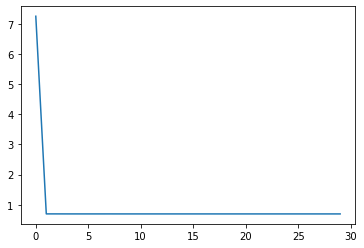

In [28]:
plt.plot(track_loss_snvrg)

## Plots

In [29]:
track_time_sgd = np.array(track_time_sgd)
track_time_sag = np.array(track_time_sag)
track_time_saga = np.array(track_time_saga)
track_time_sarah = np.array(track_time_sarah)
track_time_sarah_plus = np.array(track_time_sarah_plus)
track_time_spider_boost = np.array(track_time_spider_boost)
track_time_svrg = np.array(track_time_svrg)
track_time_snvrg = np.array(track_time_snvrg)


track_loss_sgd = np.array(track_loss_sgd)
track_loss_sag = np.array(track_loss_sag)
track_loss_saga = np.array(track_loss_saga)
track_loss_sarah = np.array(track_loss_sarah)
track_loss_sarah_plus = np.array(track_loss_sarah_plus)
track_loss_spider_boost = np.array(track_loss_spider_boost)
track_loss_svrg = np.array(track_loss_svrg)
track_loss_snvrg = np.array(track_loss_snvrg)

In [30]:
# In case we want plots using time, we consider only the updates in the MAX-TIME interval
if PLOT_TIME:
    track_loss_sgd = track_loss_sgd[track_time_sgd < MAX_RUNTIME]
    track_loss_sag = track_loss_sag[track_time_sag < MAX_RUNTIME]
    track_loss_saga = track_loss_saga[track_time_saga < MAX_RUNTIME]
    track_loss_sarah = track_loss_sarah[track_time_sarah < MAX_RUNTIME]
    track_loss_sarah_plus = track_loss_sarah_plus[track_time_sarah_plus < MAX_RUNTIME]
    track_loss_spider_boost = track_loss_spider_boost[track_time_spider_boost < MAX_RUNTIME]
    track_loss_svrg = track_loss_svrg[track_time_svrg < MAX_RUNTIME]
    track_loss_snvrg = track_loss_snvrg[track_time_snvrg < MAX_RUNTIME]

    track_time_sgd = track_time_sgd[track_time_sgd < MAX_RUNTIME]
    track_time_sag = track_time_sag[track_time_sag < MAX_RUNTIME]
    track_time_saga = track_time_saga[track_time_saga < MAX_RUNTIME]
    track_time_sarah = track_time_sarah[track_time_sarah < MAX_RUNTIME]
    track_time_sarah_plus = track_time_sarah_plus[track_time_sarah_plus < MAX_RUNTIME]
    track_time_spider_boost = track_time_spider_boost[track_time_spider_boost < MAX_RUNTIME]
    track_time_svrg = track_time_svrg[track_time_svrg < MAX_RUNTIME]
    track_time_snvrg = track_time_snvrg[track_time_snvrg < MAX_RUNTIME]

In [31]:
min = np.min(
    np.concatenate((
        track_loss_sarah,
        track_loss_sarah_plus,
        track_loss_snvrg,
        track_loss_sag,
        track_loss_saga,
        track_loss_snvrg,
        track_loss_spider_boost,
        track_loss_sgd,
    ))
)

In [32]:
# Finding the best guess of F(x*)
min = np.min((min, MIN))

### Iterations

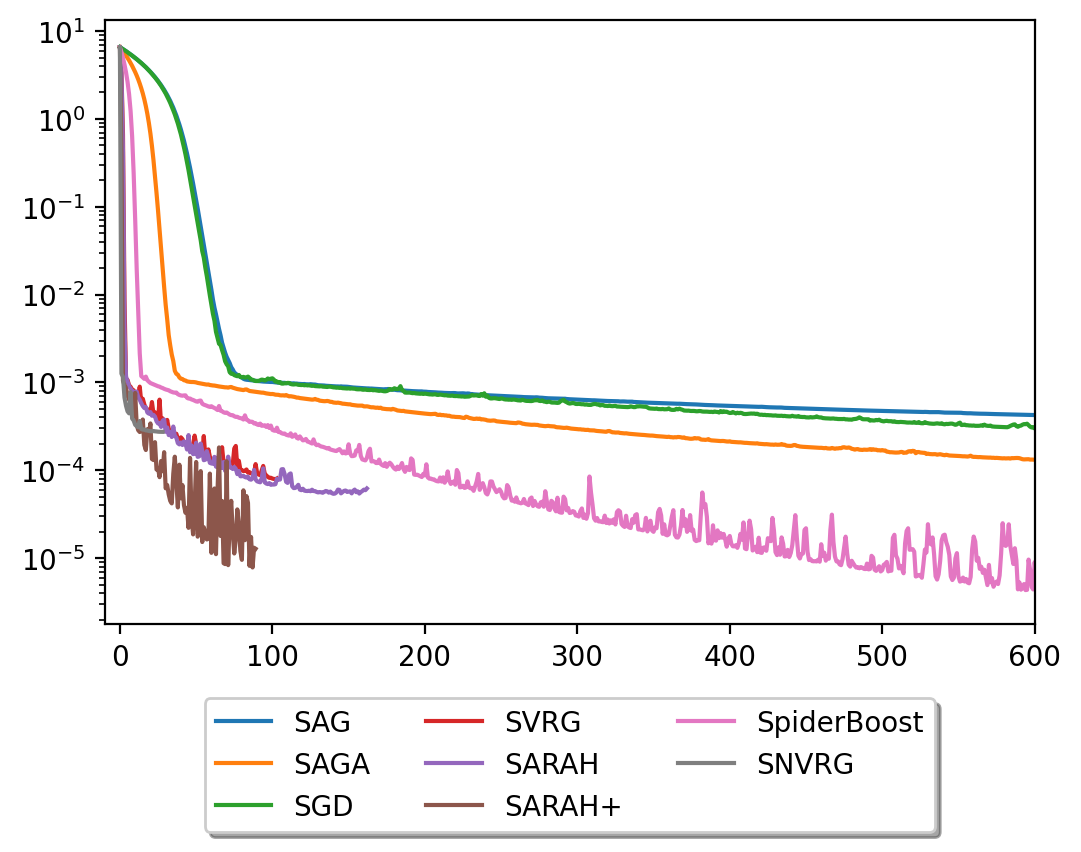

In [41]:
plt.figure(dpi=DPI_PLOTS)
plt.xlim(-10,600)
plt.semilogy(track_loss_sag - min)
plt.semilogy(track_loss_saga - min)
plt.semilogy(track_loss_sgd - min)
plt.semilogy(track_loss_svrg - min)
plt.semilogy(track_loss_sarah - min)
plt.semilogy(track_loss_sarah_plus - min)
plt.semilogy(track_loss_spider_boost - min)
plt.semilogy(track_loss_snvrg - min)

plt.legend([ "SAG", "SAGA", "SGD", "SVRG", "SARAH", "SARAH+", "SpiderBoost", "SNVRG"], loc='upper center', bbox_to_anchor=(0.5, -0.1),
           fancybox=True, shadow=True, ncol=3)

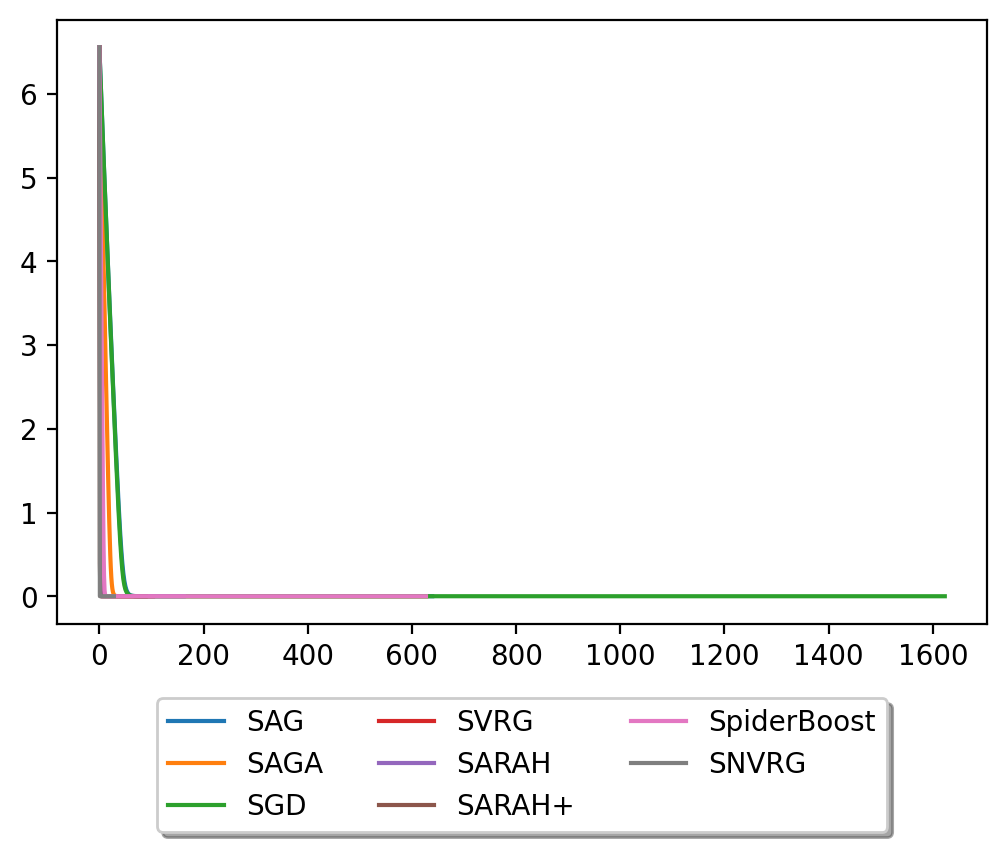

In [34]:
#robust_lin_reg_residual_log
plt.figure(dpi=DPI_PLOTS)
plt.plot(track_loss_sag - min)
plt.plot(track_loss_saga - min)
plt.plot(track_loss_sgd - min)
plt.plot(track_loss_svrg - min)
plt.plot(track_loss_sarah - min)
plt.plot(track_loss_sarah_plus - min)
plt.plot(track_loss_spider_boost - min)
plt.plot(track_loss_snvrg - min)

plt.legend(["SAG", "SAGA", "SGD", "SVRG", "SARAH", "SARAH+", "SpiderBoost", "SNVRG"], loc='upper center', bbox_to_anchor=(0.5, -0.1),
           fancybox=True, shadow=True, ncol=3)

### Time

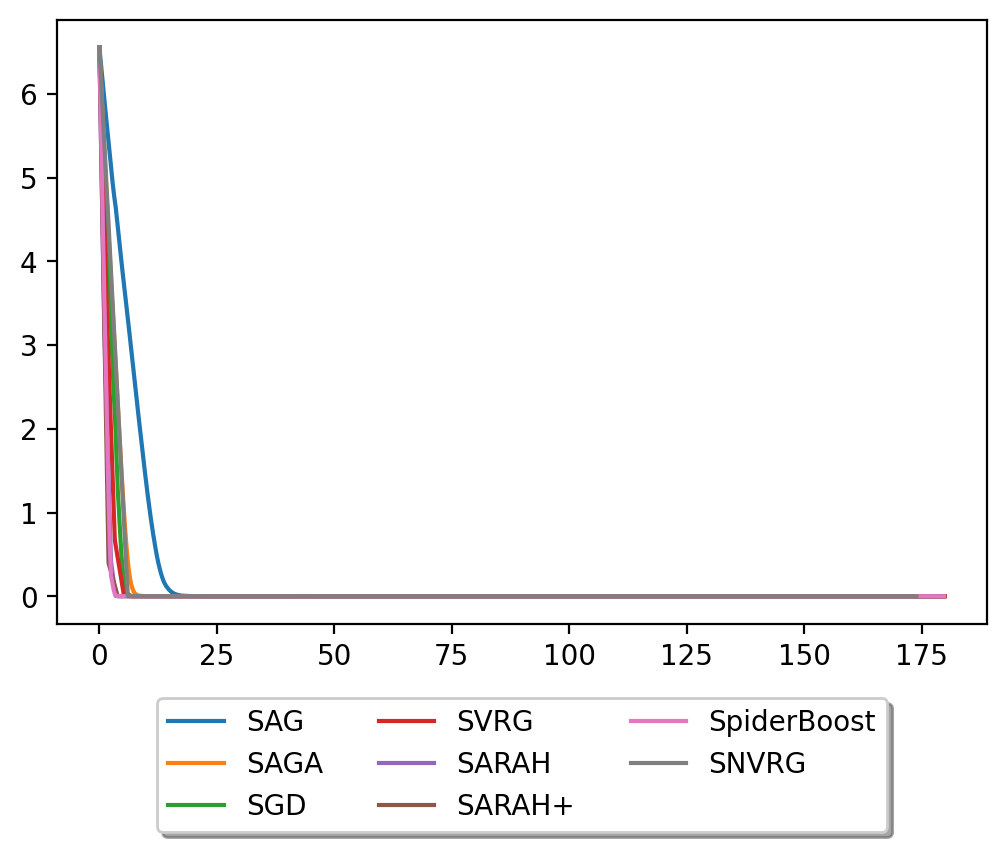

In [35]:
plt.figure(dpi=DPI_PLOTS)
plt.plot(track_time_sag, track_loss_sag - min)
plt.plot(track_time_saga, track_loss_saga - min)
plt.plot(track_time_sgd, track_loss_sgd - min)
plt.plot(track_time_svrg, track_loss_svrg - min)
plt.plot(track_time_sarah, track_loss_sarah - min)
plt.plot(track_time_sarah_plus, track_loss_sarah_plus - min)
plt.plot(track_time_spider_boost, track_loss_spider_boost - min)
plt.plot(track_time_snvrg, track_loss_snvrg - min)

plt.legend(["SAG", "SAGA", "SGD", "SVRG", "SARAH", "SARAH+", "SpiderBoost", "SNVRG"], loc='upper center', bbox_to_anchor=(0.5, -0.1),
           fancybox=True, shadow=True, ncol=3)

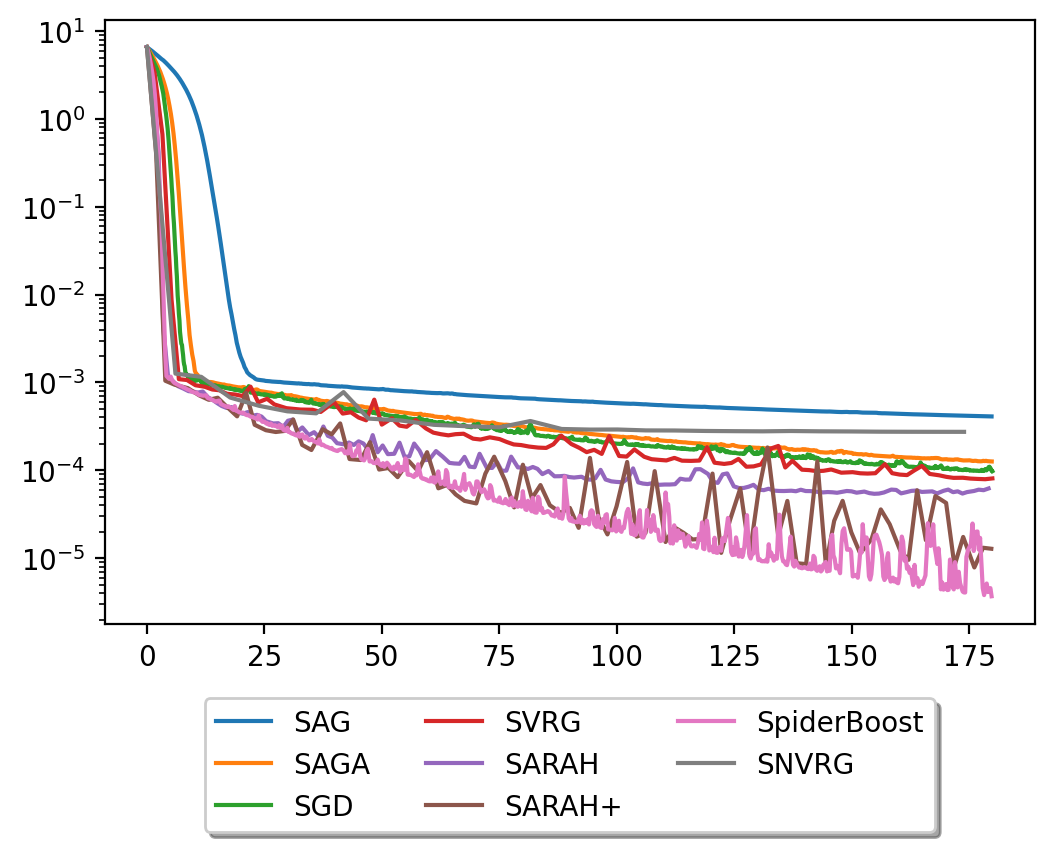

In [36]:
plt.figure(dpi=DPI_PLOTS)
plt.semilogy(track_time_sag, track_loss_sag - min)
plt.semilogy(track_time_saga, track_loss_saga - min)
plt.semilogy(track_time_sgd, track_loss_sgd - min)
plt.semilogy(track_time_svrg, track_loss_svrg - min)
plt.semilogy(track_time_sarah, track_loss_sarah - min)
plt.semilogy(track_time_sarah_plus, track_loss_sarah_plus - min)
plt.semilogy(track_time_spider_boost, track_loss_spider_boost - min)
plt.semilogy(track_time_snvrg, track_loss_snvrg - min)

plt.legend(["SAG", "SAGA", "SGD", "SVRG", "SARAH", "SARAH+", "SpiderBoost", "SNVRG"], loc='upper center', bbox_to_anchor=(0.5, -0.1),
           fancybox=True, shadow=True, ncol=3)

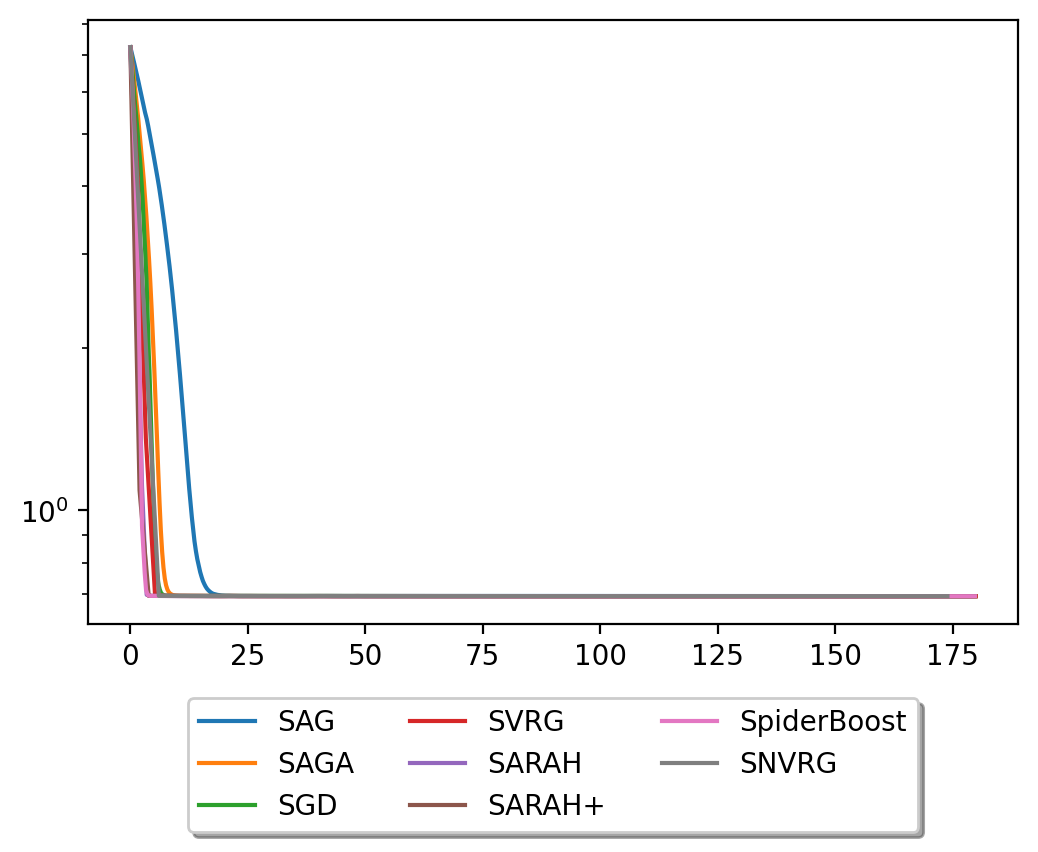

In [37]:
plt.figure(dpi=DPI_PLOTS)
plt.semilogy(track_time_sag, track_loss_sag)
plt.semilogy(track_time_saga, track_loss_saga)
plt.semilogy(track_time_sgd, track_loss_sgd)
plt.semilogy(track_time_svrg, track_loss_svrg)
plt.semilogy(track_time_sarah, track_loss_sarah)
plt.semilogy(track_time_sarah_plus, track_loss_sarah_plus)
plt.semilogy(track_time_spider_boost, track_loss_spider_boost)
plt.semilogy(track_time_snvrg, track_loss_snvrg)

plt.legend(["SAG", "SAGA", "SGD", "SVRG", "SARAH", "SARAH+", "SpiderBoost", "SNVRG"], loc='upper center', bbox_to_anchor=(0.5, -0.1),
           fancybox=True, shadow=True, ncol=3)

## Animation

In [38]:
import plotly.graph_objects as go
if SHOW_ANIMATION and data.shape[1] == 2:
    x_range = (-30,80)
    y_range = (-30,80)
    x = np.linspace(*x_range, 50)
    y = np.linspace(*y_range, 50)
    X, Y = np.meshgrid(x, y)
    Z = np.array([
        [loss(data, np.array([x,y]), targets) for x,y in zip(x_r, y_r)]
        for x_r, y_r in zip(X,Y)
    ])

    tracks = [
        track_w_sgd, track_w_svrg,
        track_w_sarah, track_w_spider_boost, track_w_snvrg
    ]
    names = [
        "SGD", "SVRG", "SARAH", "SpiderBoost", "SNVRG"
    ]

    frames_tot = np.min([
        len(t) for t in tracks
    ])
    surface = go.Surface(
        showscale=False,
        z=Z, x=X, y=Y,
        colorscale=[[0, 'rgba(0,0,255, 0.3)'], [1, 'rgba(255,0,0, 0.3)']],
        colorbar=None
    ),

    frames = []
    for frame in range(frames_tot):
        grid = []
        #generate horizontal scatter plot:
        for idx, x_ in enumerate(x):
            grid.append(
                go.Scatter3d(
                    x=[x_] * (len(y)), y=y, z=Z[:,idx],
                    mode="lines",
                    showlegend=False,
                    line=dict(
                        color=f"rgb(200,200,200)",
                        width=2
                    )
                )
            )
        for idx, y_ in enumerate(y):
            grid.append(
                go.Scatter3d(
                    x=x, y=[y_] * (len(x)), z=Z[idx,:],
                    mode="lines",
                    showlegend=False,
                    line=dict(
                        color=f"rgb(200,200,200)",
                        width=2
                    )
                )
            )



        frame_data = grid + [
            go.Surface(
                showscale=False,
                z=Z, x=X, y=Y,
                colorscale=[[0, 'rgba(0,0,255, 0.3)'], [1, 'rgba(255,0,0, 0.3)']],
                colorbar=None
            )
        ]
        for i, (track, name) in enumerate(zip(tracks, names)):
            track = track[:frame]
            xx, yy = np.hsplit(np.array(track),2)
            zz = np.array([loss(data, w_, targets) for w_ in track])
            xx = xx.reshape(-1)
            yy = yy.reshape(-1)
            zz = zz.reshape(-1)
            color = int(i/len(tracks)*255)
            frame_data.append(
                go.Scatter3d(
                    name=name,
                    x=xx, y=yy, z=zz,
                    marker=dict(
                        size=4,
                        color=f"hsl({color}, 100%, 50%)",
                        colorscale='Viridis',
                    ),
                    line=dict(
                        color=f"hsl({color}, 100%, 50%)",
                        width=2
                    )
                )
            )
        frames.append(go.Frame(data=frame_data)) #1

    fig = go.Figure(data=frames[0].data, frames=frames)

    fig.update_layout(
        width=1600,height=1000,autosize=True,
        scene=dict(
            aspectratio = dict( x=1, y=1, z=1 ),
            aspectmode = 'manual'
        ),
        updatemenus=[dict(
            type="buttons",
            buttons=[dict(args = [],
                          label = "Play",
                          method = "animate")]
        )]
    )

    import json
    camera = json.loads("{'center': {'x': 0.006366696856033653, 'y': -0.05218330435246074, 'z': -0.0739852163325267}, 'eye': {'x': -0.7885156751277191, 'y': -1.1561474889685182, 'z': 0.7659138958640532}}".replace("'", '"'))
    fig.update_layout(scene_camera=camera)


    fig.show(renderer="browser")


    #USED TO FIND CAMERA
    # import plotly.graph_objects as go
    # import dash
    # import dash_core_components as dcc
    # import dash_html_components as html
    # from dash.dependencies import Input, Output
    # app = dash.Dash()
    # app.layout = html.Div([
    #     html.Div(id="output"),        # use to print current relayout values
    #     dcc.Graph(id="fig", figure=fig)
    # ])
    # @app.callback(
    #     Output("output", "children"),
    #     Input("fig", "relayoutData")
    # )
    # def show_data(data):
    #     # show camera settings like eye upon change
    #     return [str(data)]
    # app.run_server(debug=False, use_reloader=False)

In [39]:
# fig.write_html("/Users/albertosinigaglia/Desktop/cross_entropy_regularized-2.html")